Customer Churn Prediction

In [ ]:
# Objective -- Predict Customer Churn for a subscription based service or business using 
#              Historical data with usage behaviour and demographics.

In [2]:
# Step 1 :- Import Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
# Step 2 :- Load Dataset

try:
    data = pd.read_csv('Churn_Modelling.csv')
except FileNotFoundError:
    print("Error: 'Churn_Modelling.csv' not found.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

In [6]:
# Step 3 :- Data Exploration

print("### Data Exploration ###")
print("Dataset Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("Churn Distribution:\n", data['Exited'].value_counts(normalize=True))
print("Missing Values:\n", data.isnull().sum())

### Data Exploration ###
Dataset Shape: (10000, 14)
Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Churn Distribution:
 Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64
Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
%matplotlib inline

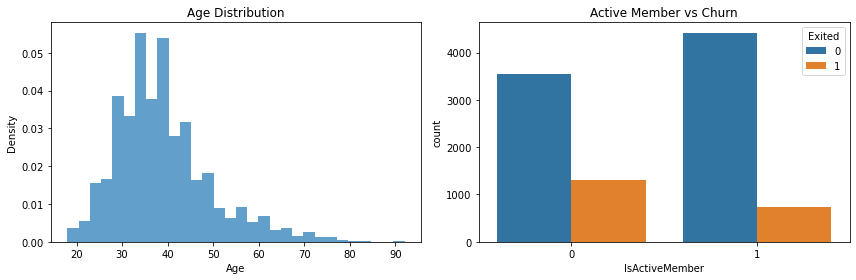

In [10]:
# Visualize key features
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=30, density=True, alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.subplot(1, 2, 2)
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Active Member vs Churn')
plt.tight_layout()
plt.show()

In [12]:
# Step 4 :- Data Preprocessing

# Drop Irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Handle missing values
data = data.dropna()
print("\nShape after preprocessing:", data.shape)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Features and target
X = data.drop('Exited', axis=1)
y = data['Exited']
print("Feature Matrix Shape:", X.shape)


Shape after preprocessing: (10000, 11)
Feature Matrix Shape: (10000, 10)


In [14]:
# Step 5 :- Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (8000, 10)
Test Set Shape: (2000, 10)



### Logistic Regression ###
Training Completed
Accuracy: 0.815
Classification Report:
               precision    recall  f1-score   support

    No Churn       0.83      0.97      0.89      1607
       Churn       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



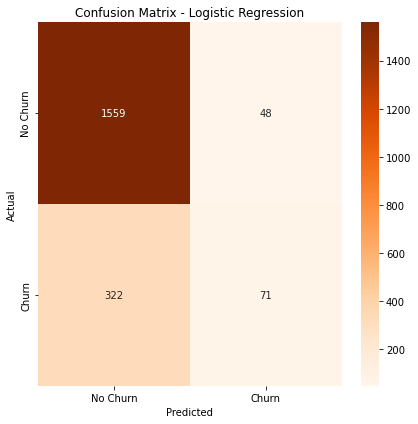

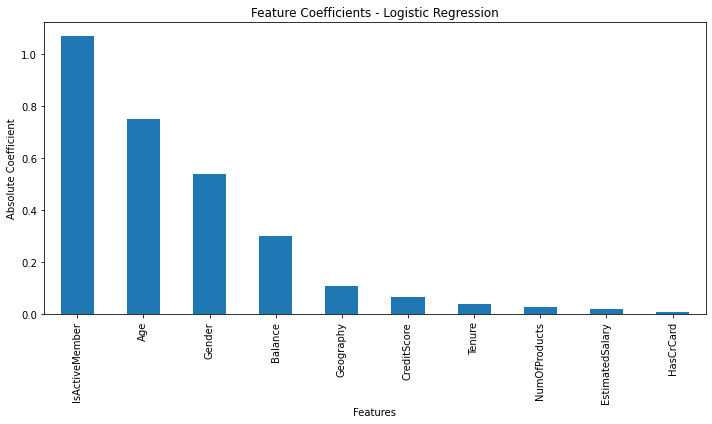

Top 5 Features (by coefficient):
 IsActiveMember    1.068938
Age               0.751840
Gender            0.539833
Balance           0.302290
Geography         0.108011
dtype: float64
Model saved as 'churn_logistic_regression_model.pkl'

### Random Forest ###
Training Completed
Accuracy: 0.8645
Classification Report:
               precision    recall  f1-score   support

    No Churn       0.88      0.96      0.92      1607
       Churn       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



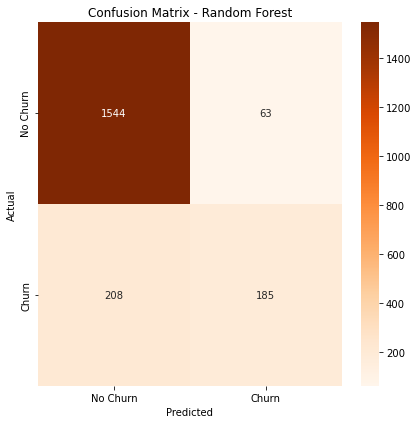

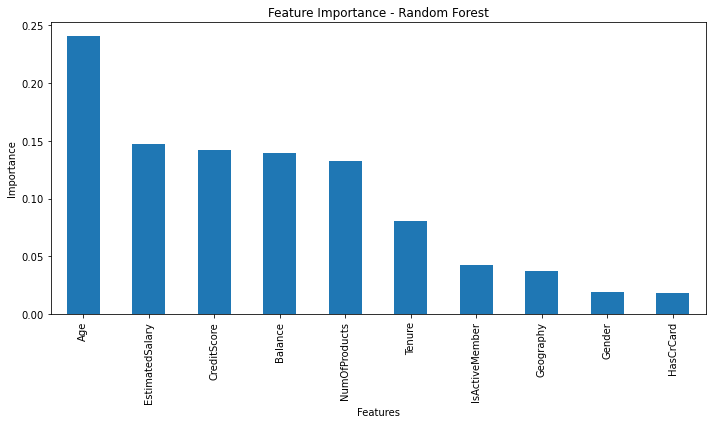

Top 5 Features:
 Age                0.240586
EstimatedSalary    0.147489
CreditScore        0.142334
Balance            0.139068
NumOfProducts      0.132435
dtype: float64
Model saved as 'churn_random_forest_model.pkl'

### Gradient Boosting ###
Training Completed
Accuracy: 0.866
Classification Report:
               precision    recall  f1-score   support

    No Churn       0.88      0.96      0.92      1607
       Churn       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



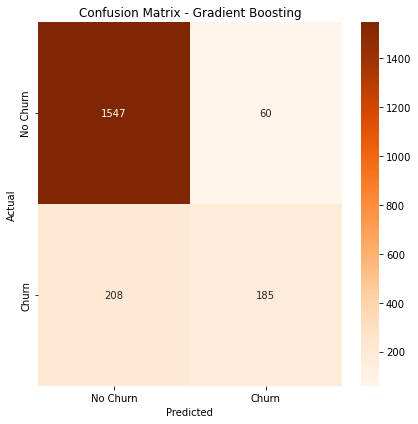

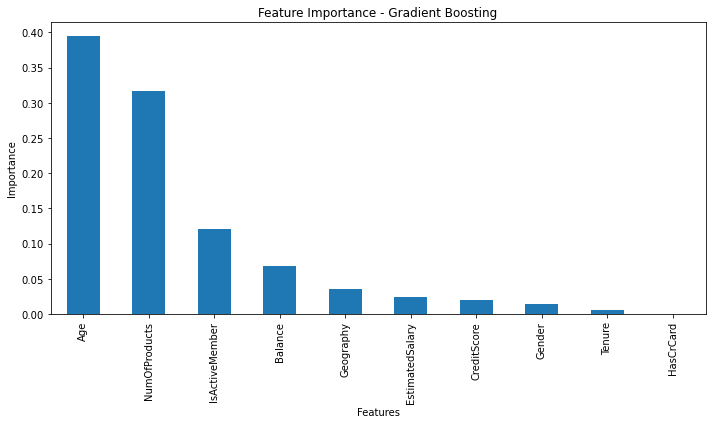

Top 5 Features:
 Age               0.394402
NumOfProducts     0.316219
IsActiveMember    0.121439
Balance           0.068854
Geography         0.035113
dtype: float64
Model saved as 'churn_gradient_boosting_model.pkl'


In [16]:
# Step 6 :- Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}
for model_name, model in models.items():
    print(f"\n### {model_name} ###")
    # Train
    try:
        model.fit(X_train, y_train)
        print("Training Completed")
    except Exception as e:
        print(f"Error training {model_name}: {e}")
        continue

    # Evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", round(accuracy, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Feature Importance (if applicable)
    if model_name != 'Logistic Regression':
        importances = pd.Series(model.feature_importances_, index=X.columns)
        plt.figure(figsize=(10, 6))
        importances.sort_values(ascending=False).plot(kind='bar')
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()
        print(f"Top 5 Features:\n", importances.sort_values(ascending=False).head())
    else:
        # For Logistic Regression, use coefficients
        coef = pd.Series(np.abs(model.coef_[0]), index=X.columns)
        plt.figure(figsize=(10, 6))
        coef.sort_values(ascending=False).plot(kind='bar')
        plt.title('Feature Coefficients - Logistic Regression')
        plt.xlabel('Features')
        plt.ylabel('Absolute Coefficient')
        plt.tight_layout()
        plt.show()
        print("Top 5 Features (by coefficient):\n", coef.sort_values(ascending=False).head())

    # Save model
    joblib.dump(model, f'churn_{model_name.lower().replace(" ", "_")}_model.pkl')
    print(f"Model saved as 'churn_{model_name.lower().replace(' ', '_')}_model.pkl'")

In [18]:
# Step 7 :- Example Prediction (using Random Forest)
rf_model = joblib.load('churn_random_forest_model.pkl')
sample_customer = X_test.iloc[[0]]
prediction = rf_model.predict(sample_customer)
print("\n### Example Prediction (Random Forest) ###")
print("Sample Customer Features:\n", X_test.iloc[0])
print("Predicted Churn (0=No, 1=Yes):", prediction[0])


### Example Prediction (Random Forest) ###
Sample Customer Features:
 CreditScore       -0.564197
Geography          1.000000
Gender             1.000000
Age               -0.660018
Tenure            -0.695982
Balance            0.324119
NumOfProducts      0.807737
HasCrCard          0.000000
IsActiveMember     0.000000
EstimatedSalary   -1.013811
Name: 6252, dtype: float64
Predicted Churn (0=No, 1=Yes): 0


In [20]:
# Step 8 :- Save Scaler and Encoder
joblib.dump(scaler, 'churn_scaler.pkl')
joblib.dump(le, 'churn_label_encoder.pkl')
print("Scaler and encoder saved as 'churn_scaler.pkl' and 'churn_label_encoder.pkl'")

Scaler and encoder saved as 'churn_scaler.pkl' and 'churn_label_encoder.pkl'
